# Assignment 03 - MySQL
*EMSE 6586 - DBMS for Analytics*

Due **5/12/19 @ 11:59pm**

*Notes:*
 - All code should follow the PEP 8 Style Guide for Python
 - Assignment should be submitted using jupyter notebooks
  - File name should follow “{Your Name} – Assignment_XX_Submission”
  - Each Task should be contained in its own cell
  - Each Task should be properly commented
  - Each Task should print out the answer to the Task if appropriate
  - Sample submission can be found on blackboard
  - **Not following these standards may result in lost points**

In [1]:
import pymysql.cursors
import pandas as pd

# Connect to the database
conn = pymysql.connect(host='gwumysql-restore.cazdwdlcg6dm.us-east-2.rds.amazonaws.com',
                             user='EMSE6992',
                             port=3306,
                             db='EMSE6992',
                             password='MySQLpass')

cursor = conn.cursor()
print(dir(cursor))

['DataError', 'DatabaseError', 'Error', 'IntegrityError', 'InterfaceError', 'InternalError', 'NotSupportedError', 'OperationalError', 'ProgrammingError', 'Warning', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_executed', '_clear_result', '_conv_row', '_defer_warnings', '_do_execute_many', '_do_get_result', '_ensure_bytes', '_escape_args', '_executed', '_get_db', '_nextset', '_query', '_result', '_rows', '_show_warnings', '_warnings_handled', 'arraysize', 'callproc', 'close', 'connection', 'description', 'execute', 'executemany', 'fetchall', 'fetchmany', 'fetchone', 'max_stmt_length', 'mogrify', 'nextset', 'rowcount', 'rownumber', 'scroll', 'setinpu

# Task 1

Create a pandas dataframe that is loaded with the records returned from joining the **favorites**, **statuses**, and **users** tables.

_Note: Ensure you are joining tables based on their foreign key dependencies_

In [2]:
"""
This task is to create a dataframe with the records returned from joining the favorites, statuses and users tables.
It will return the results from joining tables first and then convert the results to dataframe
"""
import pandas as pd
res=cursor.execute("SELECT * FROM favorites INNER JOIN statuses ON favorites.status_id=statuses.status_id INNER JOIN users ON favorites.user_id=users.user_id")
joined_data = cursor.fetchone()
print(joined_data)
joined_data = cursor.fetchall()
df=pd.DataFrame(list(joined_data))
cols=['fav_status_id','user_id','fav_user_screen_name','statuses_created_date','statuses_favorites_count','statuses_status_id','statuses_lang','statuses_retweet_count','statuses_source','statuses_text','statuses_truncated','statuses_user_id','user_created_date','user_description','user_favorites_count','user_friends_count','user_user_id','user_listed_count','user_location','user_name','user_screen_name','user_statuses_count','user_url','user_verified']
df.columns=cols
print(df.head())

('1000001248018534401', '15513604', 'foxandfriends', datetime.date(2018, 5, 25), 682, '1000001248018534401', 'en', 129, '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'No better song to start the day @TheLeeGreenwood + new alarm clock tone, yes! #FoxConcert https://t.co/4Pc7R1u27v', None, '999811097225056257', datetime.date(2008, 7, 21), "America's #1 cable morning news show", 5500, 1080, '15513604', 8332, 'New York City', 'FOX & friends', 'foxandfriends', 93944, 'https://t.co/xg790NQUNl', 1)
         fav_status_id             user_id fav_user_screen_name  \
0  1000006145375981569            15513604        foxandfriends   
1  1000007708563640320           633797941           TrumpDoral   
2  1000012222108782594          2908170952       DiamondandSilk   
3  1000015503774150656          2325495378            TrumpGolf   
4  1000015503774150656  720293443260456960                Trump   

  statuses_created_date  statuses_favorites_count   statuses

# Task 2

 1. Calculate the average retweet count per user
  - You must accomplish this using a **single SQL query**
  - _Hint: GROUP BY will be helpful_
 2. Plot the distribution of the averages

*Note: For this task use the **retweet_count** column in the **statuses** table*

0.0000
166.0000
10.0000
0.0000
0.0000
0.0000
1.0000
0.0000
0.0000
1.5000
1.0000
1.0000
0.0000
2.0000
5.0000
0.0000
0.0000
98.0000
0.0000
0.0000
0.0000
0.0000
0.0000
566.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
170410.0000
0.0000
0.0000
0.0000
0.0000
90162.0000
2.0000
0.0000
3.0000
0.0000
60.0000
0.0000
0.0000
0.0000
3.0000
0.0000
0.0000
7129.5000
0.0000
0.0000
0.0000
0.0000
0.0000
4.5733
0.0000
0.0000
187.0000
0.0000
2.0000
2.0000
3.7500
0.0000
5.6250
0.0000
8.0000
0.0000
0.0000
0.0000
5733.5000
0.0000
0.0000
7981.0000
0.0000
0.0000
2.0000
1.0000
0.0000
0.0000
9594.0000
2.0000
80.5000
5.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
7.0000
0.0000
2.0000
0.0000
0.0000
0.0000
0.0000
52.0000
0.0000
1.0000
0.0000
0.0000
0.0000
0.0000
0.0000
525.6667
0.0000
0.0000
0.0000
176.1667
0.0000
0.0000
1.0000
8.0000
0.0000
5.0000
0.0000
4227.0000
0.0000
12.0000
0.0000
7.5000
0.0000
23.0000
0.0000
0.0000
0.0000
1.0000
3.0000
1655.9000
0.0000
0.0000
0.0000
29.0000
0.0000
0.0000
0.0000
0.0000
0.0

59.5000
22.0000
0.0000
0.0000
0.0000
0.0000
4.0000
93.2500
18.0000
81.0000
62.5000
0.0000
411.2727
386.0000
37.0000
54.1667
0.0000
6.2000
0.0000
0.0000
0.0000
67.0000
30.0000
0.0000
4.0000
4.0000
4.0000
123.2500
18.0000
1877.0000
8.0000
1.0000
118.0000
0.0000
10.0000
1.0000
1906.6000
0.0000
233.0000
0.0000
142.0000
0.0000
5.0000
24.0000
1.0000
0.0000
24.0000
2.0000
218.0000
0.0000
592.0000
1.0000
89.0000
0.0000
10.0000
1343.6000
2423.8453
0.0000
1.0000
0.0000
0.0000
24.0000
1.0000
0.0000
1.0000
0.0000
0.0000
0.0000
119.0000
52.0000
215.7500
3.0000
2.0000
1.5000
0.0000
0.0000
0.0000
149.0000
21.0000
515.5000
0.0000
5.4000
0.0000
706.0000
2.0000
1.0000
2.0000
0.0000
0.0000
0.0000
6.0000
28.0000
52.0000
413.0000
2.0000
0.0000
4.2105
1.0000
846.5000
5.6667
1.0000
1118.0000
2.0000
1.0000
0.0000
0.0000
11.0000
0.0000
412.0000
1.0000
21.0000
2.0000
341.0000
2916.3103
3.0000
5034.0000
0.0000
1197.7500
422.5000
2337.5000
1839.0000
59.0000
515.5455
3.0000
1.0000
0.0000
6908.3182
0.0000
15654.000

17.0000
2.0000
0.0000
0.0000
5.0000
0.0000
0.0000
9.0000
6.0000
0.0000
744.0000
3927.6667
5.0000
9535.0000
11.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
2.0000
4776.0000
1129.0000
1.0000
6.0000
20.0000
1.3333
15534.0000
0.0000
48.6667
3311.0000
33.0000
0.0000
4.5000
0.0000
2.0000
2853.8600
2.0000
0.0000
0.5333
483.0000
1630.0000
30.0000
31.0000
0.0000
3.0000
2.5000
21.0000
3.0000
130.8333
3.6667
453.0000
0.0000
1.0000
0.0000
4.0000
0.0000
5.0000
4.3333
4.0000
17.7500
0.0000
0.0000
963.0000
0.0000
0.0000
0.0000
0.0000
28.0000
0.0000
1.0000
0.0000
0.0000
1.0000
1.0000
1.0000
0.0000
0.0000
9.0000
1.6667
8.0000
5.1563
7.0000
4.0000
1.0000
0.0000
1.0000
2.0000
0.6667
1.0000
2.0000
0.0000
0.0000
406874.0000
4.0000
1.0000
0.0000
3.0000
382.0000
65.0000
0.0000
28.0000
268.3333
65.0000
0.0000
0.0000
0.6667
10.0000
0.0000
0.0000
0.0000
100.0000
0.0000
0.0000
0.0000
0.0000
1042.2500
114.0000
0.0000
1.0000
1.0000
0.0000
1558.5000
5.0000
1.5000
0.0000
0.0000
1291.6190
0.0000
518.0000
0.0000
0.0

0.0000
24.0000
1.0000
0.0000
1.0000
2.0000
8.0000
9.0000
4004.0000
0.0000
0.0000
8.0000
0.0000
2.0000
546.5000
3.2500
0.0000
2.0000
385.0000
0.0000
49.5000
209.0000
5.0000
47.0000
357.0000
38.0000
0.0000
0.0000
1.0000
1.0000
0.0000
0.0000
0.0000
0.0000
0.0000
423.7707
10.0000
10398.0000
1.0000
0.0000
0.0000
0.0000
0.0000
10.0000
0.0000
4.0000
1.0000
0.0000
1.6667
39.0000
1.0000
1.0000
0.0000
0.0000
1.0000
28.0000
0.0000
0.0000
229.5000
0.0000
0.0000
257.2500
0.0000
0.0000
0.0000
5.0000
0.0000
55.5000
9.2500
0.0000
0.0000
114.5000
0.6000
0.0000
0.0000
0.0000
1.0000
1267.0000
0.0000
0.0000
6459.5000
2.0000
1.0000
0.0000
1.0000
10.0000
0.0000
38.2500
2.0000
20.0000
5.0000
786.0000
1.0000
0.0000
0.0000
22.5000
0.0000
0.0000
6.0000
79.0000
0.0000
0.0000
1.0000
0.0000
0.0000
0.0000
33.0000
169.5000
0.0000
0.0000
7.0000
0.0000
572.0000
1768.4615
2.0000
22.0000
0.0000
0.5000
0.5000
0.0000
0.0000
0.0000
1.0000
0.0000
21.0000
0.0000
0.0000
0.0000
0.0000
3.0000
0.0000
4219.0000
0.0000
0.0000
0.00

55.0000
0.0000
1401.0000
0.0000
9.0000
0.0000
3.0000
1.0000
0.0000
2.0000
0.0000
0.0000
0.0000
2.5000
3.0000
275.4211
455.0000
0.0000
68.0000
90.8000
20.0927
11.0000
4.0000
1343.7500
0.0000
0.0000
0.0000
11585.0000
354.5000
0.0000
0.0000
0.5000
2.0000
0.0000
1076.0000
3.0000
0.0000
0.0000
24.0000
0.0000
3.0000
2.0000
21.3333
0.0000
9.0000
0.0000
0.0000
1.0000
40.0000
1.0000
25.6000
1.0000
1132.2500
0.0000
0.0000
0.0000
1.0000
0.0000
0.0000
0.6667
2073.7143
4.0000
0.0000
1.0000
5.0000
951.0000
21.0000
6.0000
12.0000
322.0000
0.0000
0.0000
25.0000
1.0000
7.0000
180.6000
0.0000
731.0000
0.0000
729.0000
75.0000
80.0000
1.3333
0.0000
0.0000
361.0000
0.0000
0.0000
4.0000
0.0000
0.0000
6009.0000
878.2000
1.0000
1.0000
18.0000
0.0000
0.0000
0.0000
0.0000
0.0000
3.0000
278.0000
0.0000
0.0000
2.0000
0.0000
0.0000
0.0000
0.0000
0.0000
3.3333
0.0000
0.0000
0.0000
0.0000
4877.8000
1.0000
1.0000
900.0000
1.0000
0.0000
0.0000
1.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
45.0000
0.0000
0.00

3865.0000
1.0000
3.0000
0.0000
7872.0000
41.0000
0.0000
146.5000
2.6000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
6.0000
0.0000
0.0000
0.0000
0.0000
0.0000
4160.7308
15.0000
0.0000
58.0000
1.0000
0.0000
0.0000
0.0000
38.5000
237.8000
49.0000
24.0000
0.0000
0.0000
0.0000
0.5000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
1.0000
0.0000
2.0000
132.0000
0.0000
0.0000
278.0000
2.0000
15.0000
263.5000
0.0000
0.0000
0.0000
0.0000
0.0000
1.0000
10.0000
0.0000
12.0000
0.0000
0.0000
0.0000
0.0000
269.8000
4.0000
0.0000
531.4375
0.0000
16.0000
0.0000
1.0000
0.0000
3002.0000
1119.2500
0.0000
0.0000
1.0000
0.0000
2160.5000
0.0000
0.0000
0.0000
6390.0000
116.0000
0.0000
5.0000
16453.0000
0.0000
0.0000
262.0000
0.0000
0.0000
0.0000
771.0000
12.0000
0.0000
1.1250
8.0000
111.7500
0.0000
1292.6667
0.0000
995.5000
0.0000
7.5000
11.0000
0.0000
2.0000
9.0000
0.0000
0.0000
85.0000
0.0000
1.0000
0.0000
0.0000
12.0000
16.3333
340285.0000
38.0000
13.0000
0.5000
0.0000
0.0000
4.6000
0.0000
19.0000
0.0000
0

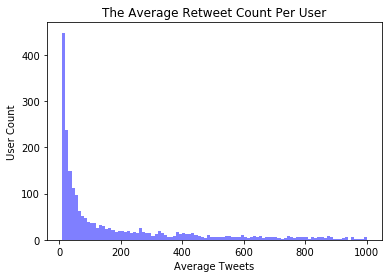

In [10]:
"""
This task calculates the average retweet count per user and then plot the distribution of the range

"""
import matplotlib.pyplot as plot
bins=range(10, 1000 + 10, 10) # use this for your bins in the histogram
#num_bins=len(bins)
#print(num_bins)
res=cursor.execute("SELECT AVG(retweet_count) FROM statuses GROUP BY user_id")
average_reweet_count = cursor.fetchall()
average_reweet_count_list=[]
#print(average_reweet_count)
for ele in average_reweet_count:
    if ele[0]!=None:
        print((ele[0]))
        average_reweet_count_list.append(float(ele[0]))
#print(average_reweet_count_list)
#res=cursor.execute("SELECT users.screen_name FROM statuses JOIN users on statuses.user_id=users.user_id GROUP BY users.user_id")
user_screen_name=cursor.fetchall()
#print(average_reweet_count)
print(len(average_reweet_count))
#print(len(user_screen_name))
plot.hist(average_reweet_count_list, bins, facecolor='blue', alpha=0.5)
plot.xlabel('Average Tweets')
plot.ylabel('User Count')
plot.title('The Average Retweet Count Per User')
#plot.xlabel(xlabel=user_screen_name)
plot.show()

# Task 3
Write a function that will determine, for a given user, the percentage of their favorite tweets that come from their friends:

$$\frac{\text{# of friend's tweets that were favorited by user}}{\text{# of tweets favorited by user}}$$

_Note: # of favorited tweets should be based off of the **favorites** table, and friendship should be based off of the **friends** table_

**Hint: For user - 'foxandfriends' you should get $\frac{8}{1160}$ or ~.7%**

In [11]:
def percentage(user):
    """
    This function takes in the screen name of a specific user and then cacluate the percentage of their favorites that go to their friends
    It is accompalished by calculating the number of friends' tweets that were favorited by user and the number of tweets favorited by user
    and then dividing those two numbers.
    Para:
    user-string-user_screen_name in the table(s)
    Return:
    None
    Print-string-the percentage of their favorites tweets that go to their friends
    """
    res=cursor.execute(f"SELECT * FROM favorites WHERE user_screen_name='{user}'")
    favorites_count=len(cursor.fetchall())
    print(favorites_count)
    res=cursor.execute(f"SELECT * from favorites JOIN statuses on favorites.status_id=statuses.status_id JOIN friends on favorites.user_id=friends.user_id WHERE statuses.user_id=friends.friend_id AND favorites.user_screen_name='{user}'")
    fav_friends_count=len(cursor.fetchall())
    print(fav_friends_count)
    print("percentge ="+str(fav_friends_count/favorites_count))

percentage("foxandfriends")

1160
8
percentge =0.006896551724137931


SyntaxError: invalid syntax (<ipython-input-37-5f159ec88e8d>, line 1)

In [ ]:
#SELECT * FROM favorites WHERE user_screen_name='foxandfriends'

# Task 4

How would you include the user_mentions or hashtags into our SQL datbase structure? Your response should take the following questions into consideration:
 - What tables would you modify?
 - What tables would you create?
  - What columns would these tables have?
 - What foreign keys/relationships would you need to make?

## Include the user_mentions or hashtags into SQL database structure

seems like it's better to create a mention table.
In this table I would include status_id, mentioner_id, mentionee_id
This table should have a one to one relationship with status table and many to many relationships with users table.
Foreign key: status_id from statuses table's status_id
             mentioner_id from users table's user_id
             mentionee_id from users table's user_id
Primary key: the combination of status_id, mentioner_id and mentionee_id

In [12]:
"""
This is the code implementation for the above creating mention table idea
"""
make_mention_table = """CREATE TABLE mention(
                        PRIMARY KEY (mentioner_id, mentionee_id, status_id),
                        FOREIGN KEY (mentioner_id)
                            REFERENCES users(user_id)
                            ON DELETE CASCADE,
                        FOREIGN KEY (mentionee_id)
                            REFERENCES users(user_id)
                            ON DELETE CASCADE,
                        FOREIGN KEY (status_id)
                            REFERENCES statuses(status_id)
                            ON DELETE CASCADE);"""

cursor.execute(make_mention_table)
connection.commit()

ProgrammingError: (1113, 'A table must have at least 1 column')

# Task 5

Insert a *status* into the **statuses** table for the *user* you created in class.

In [13]:
"""
This task is to insert a status into the statuses tavle for the user I created in class.
Due to the foreign key constraint the user_id in this object/new value has to already exist
in the users table. 
"""
query = "INSERT INTO statuses VALUES ('2019-03-25',0,'1000','en',0,'...','This is a fake status',null,'960825')"
cursor.execute(query)

# NOTE: We commit using the connection!
conn.commit()
res=cursor.execute("SELECT * FROM statuses WHERE user_id='960825';")
print(cursor.fetchall())

((datetime.date(2019, 3, 25), 0, '1000', 'en', 0, '...', 'This is a fake status', None, '960825'),)
